### Import BuildingSimilarity

To use the BuildingSimilarity class it needs to be imported BuildingSimilarity.py that is in the root of the directory.
To do this we need to add the path to the root of directory to the environmental variable PATH. If you can't important the class with the code below you might want to check if you have the right path to the root directory.

In [2]:
import json
import sys
path_to_building_similarity = ".." # important: it might be needed to change, but with the current file structure it is just ".."
sys.path.append(path_to_building_similarity)

from BuildingSimilarity import BuildingSimilarity



4 out of 12 files already exist, so 8 more request(s) are needed.
Asyncio is already running, so the requests will be done synchronously. Note that this is not the most efficient way.


In [ ]:
with open('column_weights_example.json', 'r') as f:
        column_weights = json.load(f)

Run the BuildingSimilarity class based on a neighborhood id (from the BAG)

In [3]:
bs = BuildingSimilarity(bag_data_folder='../data/amersfoort',
                        neighborhood_id="BU03071003",
                        verbose=True,
                        column_weights=column_weights,
                        feature_space_file='../data/feature_space/fs_amersfoort.csv')

bs.collection.collect_id_list()
bs.processing.run()

Using 15 core(s) to process 12 building(s)


100%|██████████| 12/12 [00:00<00:00, 22.77it/s]


,actual_volume,convex_hull_volume,oorspronkelijkbouwjaar,b3_opp_buitenmuur,b3_opp_dak_plat,b3_opp_dak_schuin,b3_opp_grond,b3_opp_scheidingsmuur,circularity_2d,hemisphericality_3d,...,turning_function_21,turning_function_22,turning_function_23,turning_function_24,turning_function_25,turning_function_26,turning_function_27,turning_function_28,turning_function_29,turning_function_30
id,,,,,,,,,,,,,,,,,,,,,
NL.IMBAG.Pand.0327100000252015-0,305.205746,305.211880,1987,102.70,0.00,72.57,46.67,53.54,0.759806,0.501967,...,0.540166,0.130515,0.308438,0.114461,0.136010,0.148979,0.182795,0.075640,0.187975,0.163777
NL.IMBAG.Pand.0307100000326243-0,383.962927,383.976354,1999,132.51,0.00,70.57,49.50,75.45,0.708463,0.485999,...,0.415420,0.096735,0.307594,0.079160,0.102632,0.114794,0.176511,0.108937,0.155608,0.129598
NL.IMBAG.Pand.0327100000258432-0,315.773898,315.774730,1972,71.25,54.09,0.00,54.09,103.58,0.757855,0.498732,...,0.540949,0.132027,0.309740,0.113895,0.136601,0.149740,0.183093,0.071292,0.187057,0.165440
NL.IMBAG.Pand.0153100000203775-0,418.740878,418.764729,1969,67.05,0.00,69.41,59.78,138.65,0.738925,0.513785,...,0.555667,0.117185,0.309217,0.099054,0.122343,0.135010,0.176231,0.072996,0.175932,0.150598
NL.IMBAG.Pand.0153100000277229-0,326.247215,336.230450,1979,75.28,11.91,36.78,42.70,122.39,0.741842,0.499191,...,0.435948,0.117325,0.309719,0.100018,0.123504,0.135051,0.175944,0.092549,0.175629,0.149646
NL.IMBAG.Pand.0327100000255061-0,425.877121,470.054647,1972,98.57,0.00,71.61,66.95,176.65,0.390029,0.379656,...,0.317811,0.081840,0.324767,0.119370,0.087720,0.088186,0.213431,0.193801,0.121443,0.112360
NL.IMBAG.Pand.0772100000262212-0,372.504095,395.475316,1956,77.68,16.73,53.71,62.30,118.67,0.711266,0.469223,...,0.417922,0.253116,0.309468,0.236701,0.264002,0.133331,0.179663,0.175752,0.160407,0.285614
NL.IMBAG.Pand.0327100000264673-0,495.726349,636.097007,1975,101.04,71.48,35.19,92.95,150.92,0.535960,0.398265,...,0.380652,0.116729,0.301587,0.189673,0.100500,0.139106,0.250149,0.152385,0.135556,0.242189
NL.IMBAG.Pand.0307100000337962-0,562.673009,655.394140,2000,196.86,15.56,63.67,70.48,102.42,0.643516,0.444761,...,0.438531,0.144002,0.504584,0.173639,0.491214,0.204037,0.247135,0.360744,0.179505,0.238542


## Similarity tests
The code below uses different techniques to find buildings that are similar to each other. The first cell runs a db_scan algorithm which clusters the data. The second cell plots the distance between all buildings in a (small) subset.

result_dbscan = bs.similarity.db_scan(eps=0.5, min_samples=2)
result_dbscan.head()

Calculating distance matrix: 100%|██████████| 66/66.0 [00:00<00:00, 328.67it/s]


Distance matrix calculated


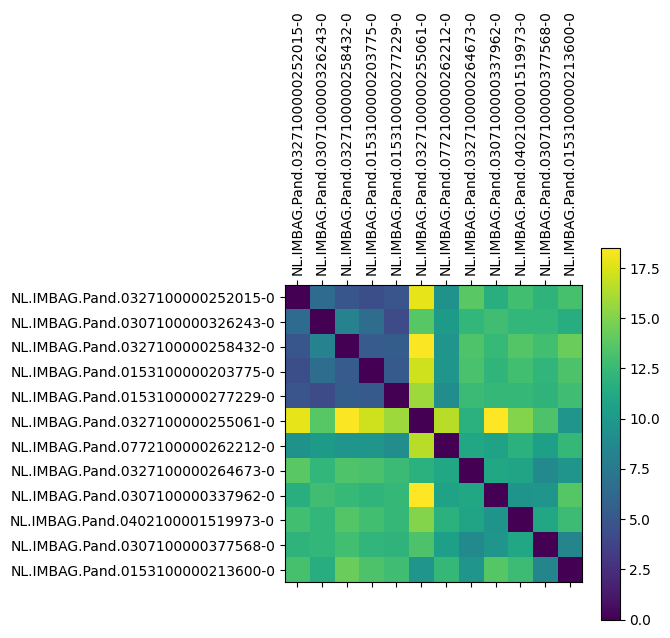

(array([[ 0.     ,  6.4867 ,  4.97642,  4.47209,  4.85359, 17.82234,
          9.49531, 13.74944, 11.61091, 12.92229, 12.01648, 13.09356],
        [ 6.4867 ,  0.     ,  8.21032,  6.64403,  4.33188, 13.72388,
         10.12313, 12.24483, 12.80965, 12.22672, 12.22953, 11.50405],
        [ 4.97642,  8.21032,  0.     ,  5.29568,  5.48139, 18.41761,
          9.63947, 13.41976, 12.3848 , 13.57907, 12.93823, 14.2509 ],
        [ 4.47209,  6.64403,  5.29568,  0.     ,  5.25576, 17.19677,
          9.6572 , 13.17284, 12.14838, 12.91338, 12.21104, 13.37495],
        [ 4.85359,  4.33188,  5.48139,  5.25576,  0.     , 15.7829 ,
          9.08057, 12.65263, 12.32527, 12.30647, 12.07777, 12.8208 ],
        [17.82234, 13.72388, 18.41761, 17.19677, 15.7829 ,  0.     ,
         16.51378, 11.85438, 18.51797, 15.0694 , 13.34779,  9.64922],
        [ 9.49531, 10.12313,  9.63947,  9.6572 ,  9.08057, 16.51378,
          0.     , 11.04864, 10.66807, 11.8471 , 10.47969, 12.338  ],
        [13.74944, 12.24483

In [4]:
bs.similarity.distance_matrix_regular(dist_matrix_path='dist_matrix_test.csv', plot_matrix=True) # note that the output below is from an example with only 10 buildings, which makes it feasible to plot the buildings